<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/imblance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble methods

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/app/My Drive': Input/output error
/content/gdrive/My Drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
train = pd.read_csv("/app/data/imb_train.csv")
test = pd.read_csv("/app/data/imb_test.csv")
train.head()

,cls,x1,x2
0,0,0.200798,0.678038
1,0,0.016620,1.576558
2,0,0.228725,-0.559534
3,0,0.126379,-0.093814
4,0,0.600821,-0.298395


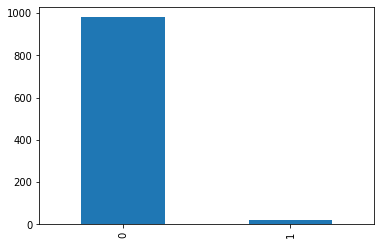

In [12]:
count_classes = pd.value_counts(train['cls'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

In [13]:
features_train=train.loc[:,"x1":"x2"]
labels_train=train["cls"]

features_test=test.loc[:,"x1":"x2"]
labels_test=test["cls"]

### 随机过采样 

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
os_features,os_labels = ros.fit_sample(features_train,labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
len(os_labels[os_labels==1])

980

### 过采样SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
len(os_labels[os_labels==1])

980

### 综合采样 

In [18]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
os_features,os_labels= smote_tomek.fit_sample(features_train,labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### CART分类树

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', 
                             max_depth=3, 
                             class_weight=None,
                             random_state=1234)  # 支持计算Entropy和GINI
clf.fit(os_features,os_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [20]:
import sklearn.metrics as metrics

print(metrics.classification_report(labels_test,clf.predict(features_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       245
           1       0.60      0.60      0.60         5

    accuracy                           0.98       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.98      0.98      0.98       250



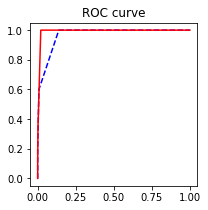

In [21]:
train_est = clf.predict(features_train)  
train_est_p = clf.predict_proba(features_train)[:, 1]  
test_est = clf.predict(features_test)  
test_est_p = clf.predict_proba(features_test)[:, 1]  
fpr_test, tpr_test, th_test = metrics.roc_curve(
    labels_test, test_est_p)

fpr_train, tpr_train, th_train = metrics.roc_curve(
    labels_train, train_est_p)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

In [22]:
print(metrics.roc_auc_score(labels_test, test_est_p))

0.9689795918367348
